# PHâN TÍCH VÀ DỰ ĐOÁN GIÁ CĂN HỘ TẠI HÀ NỘI



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CuoiKi/rawdata.csv')
pd.options.mode.chained_assignment = None  # default='warn' 
df


,address,area,price,floor,room,buildingLine
0,"Phố Hoàng Cầu, Phường Ô Chợ Dừa, Quận Đống ...",46m2,12 tỷ,4,4,8m
1,"Đường Lĩnh Nam, Phường Lĩnh Nam, Quận Hoàng M...",36m2,"2,6 tỷ",4,5,4m
2,"Đường Văn Chương, Phường Khâm Thiên, Quận Đốn...",79m2,"9,5 tỷ",---,3,15m
3,"Đường Ngô Gia Tự, Phường Đức Giang, Quận Long...",350m2,58 tỷ,1,2,40m
4,"Đường 800A, Phường Nghĩa Đô, Quận Cầu Giấy, H...",49m2,"15,3 tỷ",4,4,12m
...,...,...,...,...,...,...
2445,"Đường Võ Chí Công, Phường Nhật Tân, Quận Tây ...",155m2,"23,5 tỷ",5,4,3m
2446,"Đường Xuân La, Phường Xuân La, Quận Tây Hồ, H...",245m2,32 tỷ,6,4,6m
2447,"Phố Trích Sài, Phường Bưởi, Quận Tây Hồ, Hà Nội",140m2,"19,5 tỷ",5,4,8m
2448,"Đường Nguyễn Văn Huyên, Phường Xuân Tảo, Quận...",70m2,"16,5 tỷ",5,4,15m


# LÀM SẠCH DỮ LIỆU

## XỬ LÝ AREA


In [ ]:
print("Trước xử lý Area:")
df['area']

Trước xử lý Area:


0        46m2
1        36m2
2        79m2
3       350m2
4        49m2
        ...  
2445    155m2
2446    245m2
2447    140m2
2448     70m2
2449    200m2
Name: area, Length: 2450, dtype: object

In [ ]:
# Xử lý diện tích
for i in range(len(df)):
    dt = df['area'][i].replace(' ','').split("m")
    df['area'][i] =dt[0]
df['area'] = df['area'].map(lambda x: float(x))

In [ ]:
count = 0
for i in range(len(df)):  
    if df['area'][i] == 0:
        count += 1
print("Có " ,count , "giá trị area bằng 0")

Có  0 giá trị area bằng 0


In [ ]:
print("Sau xử lý Area:")
df['area']

Sau xử lý Area:


0        46.0
1        36.0
2        79.0
3       350.0
4        49.0
        ...  
2445    155.0
2446    245.0
2447    140.0
2448     70.0
2449    200.0
Name: area, Length: 2450, dtype: float64

## XỬ LÝ BUILDINGLINE

In [ ]:
print("Trước xử lý buildingLine:")
df['buildingLine']

Trước xử lý buildingLine:


0        8m
1        4m
2       15m
3       40m
4       12m
       ... 
2445     3m
2446     6m
2447     8m
2448    15m
2449    50m
Name: buildingLine, Length: 2450, dtype: object

In [ ]:
# Xử lý lộ giới
for i in range(len(df)):
    dt = df['buildingLine'][i].replace(' ','').split("m")
    df['buildingLine'][i] =dt[0]
    df['buildingLine'][i]= df['buildingLine'][i].replace(',','.').replace(' ','') 

# print("Có " ,count , "giá trị buildingLine bằng 0")
# print("Sau xử lý buildingLine:")
# df['buildingLine']

In [ ]:
count = 0
for i in range(len(df)):  
    if df['buildingLine'][i] == 0:
        count += 1
print("Có " ,count , "giá trị buildingLine bằng 0")

Có  0 giá trị buildingLine bằng 0


In [ ]:
print("Sau xử lý buildingLine:")
df['buildingLine']

Sau xử lý buildingLine:


0        8
1        4
2       15
3       40
4       12
        ..
2445     3
2446     6
2447     8
2448    15
2449    50
Name: buildingLine, Length: 2450, dtype: object

## XỬ LÝ PRICE

In [ ]:
# Xử lý giá
df.loc[:,'price_xl'] = df['price']
for i in range(len(df)):  
    df['price_xl'][i] = ''.join([j for j in df['price_xl'][i] if not j.isdigit()])
    df['price_xl'][i]= df['price_xl'][i].replace(',','').replace(' ','')
    df['price'][i]= df['price'][i].replace(',','.').replace(' ','') 
print(" Các loại đơn vị : ")
df['price_xl'].value_counts()



 Các loại đơn vị : 


tỷ            2315
triệu/ m        80
triệu           30
ngàn            15
tỷ/ m            8
Thỏathuận        2
Name: price_xl, dtype: int64

In [ ]:
price_xl = []
for i in range(len(df)):  
    if 'tỷ/' in df['price'][i]:
        dt = df['price'][i].split("tỷ/")
        dt[0] = round(float(dt[0]) ,2)
        price_xl.append(dt[0])
    elif 'triệu/' in df['price'][i]:
        dt = df['price'][i].split("triệu/")
        dt[0] = round(float(dt[0])/1000 * df['area'][i] ,2)
        price_xl.append(dt[0])
    elif 'tỷ' in df['price'][i]:
        dt = df['price'][i].split("tỷ")
        dt[0] = round(float(dt[0]),2)
        price_xl.append(dt[0])
    elif 'triệu' in df['price'][i]:
        dt = df['price'][i].split("triệu")
        dt[0] = round(float(dt[0])/1000 ,2)
        price_xl.append(dt[0])
    elif 'ngàn' in df['price'][i]:
        dt[0] = round((float(dt[0]) / 1000/1000),2)
        price_xl.append(dt[0])

import statistics
median_price = statistics.median(price_xl)
for i in range(len(df)):
    if 'Thỏathuận' in df['price'][i]:
        price_xl.append(median_price)
df['price'] =price_xl
df.drop('price_xl', inplace=True, axis=1)



In [ ]:
print("Sau xử lý price:")
df['price']

Sau xử lý price:


0       12.0
1        2.6
2        9.5
3       58.0
4       15.3
        ... 
2445    19.5
2446    16.5
2447    95.0
2448     9.0
2449     9.0
Name: price, Length: 2450, dtype: float64

## XỬ LÝ ADDRESS

In [ ]:
#Xử lý địa chỉ : Quận/Huyện
for i in range(len(df)):
    dt = df['address'][i].split(",")
    df['address'][i] = dt[-2]
df['address'].value_counts()

 Quận Hà Đông           373
 Quận Tây Hồ            281
 Quận Thanh Xuân        268
 Quận Đống Đa           251
 Quận Long Biên         223
 Quận Ba Đình           187
 Quận Cầu Giấy          151
 Huyện Hoài Đức         142
 Quận Nam Từ Liêm       129
 Quận Hoàng Mai         121
 Quận Hai Bà Trưng      115
 Huyện Đan Phượng        61
 Quận Bắc Từ Liêm        45
 Quận Hoàn Kiếm          36
 Huyện Thanh Trì         27
 Huyện Gia Lâm           15
 Hà Nội Quận Hà Đông     10
 Huyện Đông Anh           9
 Huyện Chương Mỹ          3
 Huyện Thạch Thất         2
 Huyện Sóc Sơn            1
Name: address, dtype: int64

In [ ]:
LE = LabelEncoder()
df['address'] = LE.fit_transform(df['address'])
print('Sau xử lý address')
df['address'] 

Sau xử lý address


0       20
1       14
2       20
3       16
4       11
        ..
2445    19
2446    19
2447    19
2448    10
2449    19
Name: address, Length: 2450, dtype: int64

# Xử lý dữ liệu trống bằng random

In [ ]:
df['room'] = df['room'].apply(lambda x : None if "---" in str(x) else x )
df['floor'] = df['floor'].apply(lambda x : None if "---" in str(x) else x )
df['buildingLine'] = df['buildingLine'].apply(lambda x : None if "---" in str(x) else x )
df.isnull().sum()


address           0
area              0
price             0
floor           704
room            593
buildingLine    784
dtype: int64

In [ ]:
random_samples_room = df['room'].dropna().sample(n=df['room'].isnull().sum(),random_state=0)
df[df['room'].isnull()].index
random_samples_room.index = df[df['room'].isnull()].index
df.loc[df['room'].isnull(), 'room']=random_samples_room

random_samples_floor = df['floor'].dropna().sample(n=df['floor'].isnull().sum(),random_state=0)
df[df['floor'].isnull()].index
random_samples_floor.index = df[df['floor'].isnull()].index
df.loc[df['floor'].isnull(), 'floor']=random_samples_floor

random_samples_buildingLine = df['buildingLine'].dropna().sample(n=df['buildingLine'].isnull().sum(),random_state=0)
df[df['buildingLine'].isnull()].index
random_samples_buildingLine.index = df[df['buildingLine'].isnull()].index
df.loc[df['buildingLine'].isnull(), 'buildingLine']=random_samples_buildingLine



In [ ]:
df.isnull().sum()

address         0
area            0
price           0
floor           0
room            0
buildingLine    0
dtype: int64

In [ ]:
df['floor'] = df['floor'].map(lambda x: float(x))
df['room'] = df['room'].map(lambda x: float(x))
df['buildingLine'] = df['buildingLine'].map(lambda x: float(x))


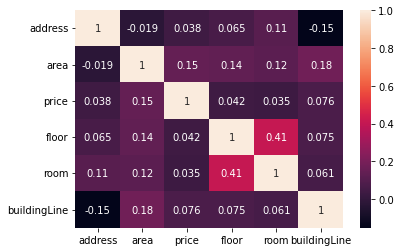

In [ ]:
import seaborn as sns
df_cor = df.corr()
sns.heatmap(df_cor, annot=True)

Nhận xét:
  - Độ tương quan giữa biến price và các biến khác thấp ( dưới 0.15)
  - Sử dụng tất cả các biến vào mô hình học máy

In [ ]:
# Lưu dữ liệu clean
# export_csv = df.to_csv(r'/content/drive/MyDrive/CuoiKi/cleandata.csv', index = None, header=True) 

# Train và Test


In [ ]:
from sklearn.model_selection import train_test_split
X=df[["area","floor","room","address","buildingLine"]]
y=df[['price']]
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)


#Xử lý dữ liệu ngoại lệ

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Sự phân bố của biến buildingLine')

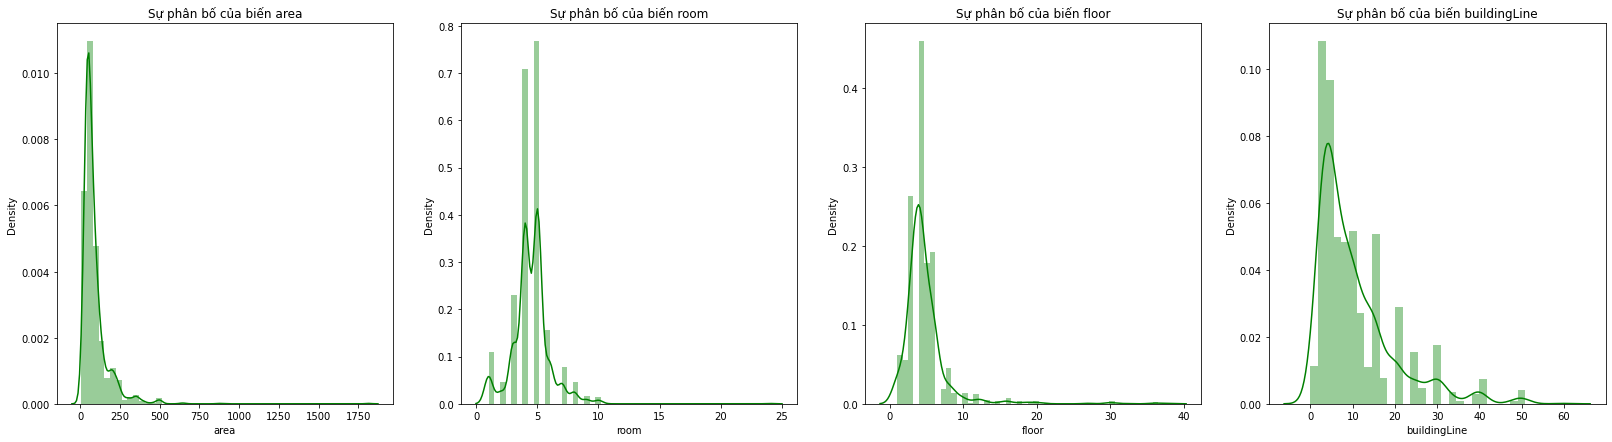

In [ ]:
import matplotlib.pyplot  as plt
import scipy.stats as stat
plt.figure(figsize=(35,7))
plt.subplot(151)
sns.distplot(x_train['area'],color='green').set_title("Sự phân bố của biến area")
plt.subplot(152)
sns.distplot(x_train['room'],color='green').set_title("Sự phân bố của biến room")
plt.subplot(153)
sns.distplot(x_train['floor'],color='green').set_title("Sự phân bố của biến floor")
plt.subplot(154)
sns.distplot(x_train['buildingLine'],color='green').set_title("Sự phân bố của biến buildingLine")

Nhận xét:
  - Các biến đều có phân bố lệch về bên trái
  - Sử dụng phương pháp IQR để xử lý ngoại lệ

In [ ]:
#Xử lý ngoại lệ
# Phan bo lệch
def XLNL(df,feature):
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bound = df[feature].quantile(0.75) + 5*iqr
    lower_bound = df[feature].quantile(0.25) - 5*iqr
    df.loc[df[feature] > upper_bound, feature] = upper_bound
    df.loc[df[feature] < lower_bound, feature] = upper_bound
XLNL(x_train,'area')
XLNL(x_train,'room')
XLNL(x_train,'floor')
XLNL(x_train,'buildingLine')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Sự phân bố của biến buildingLine')

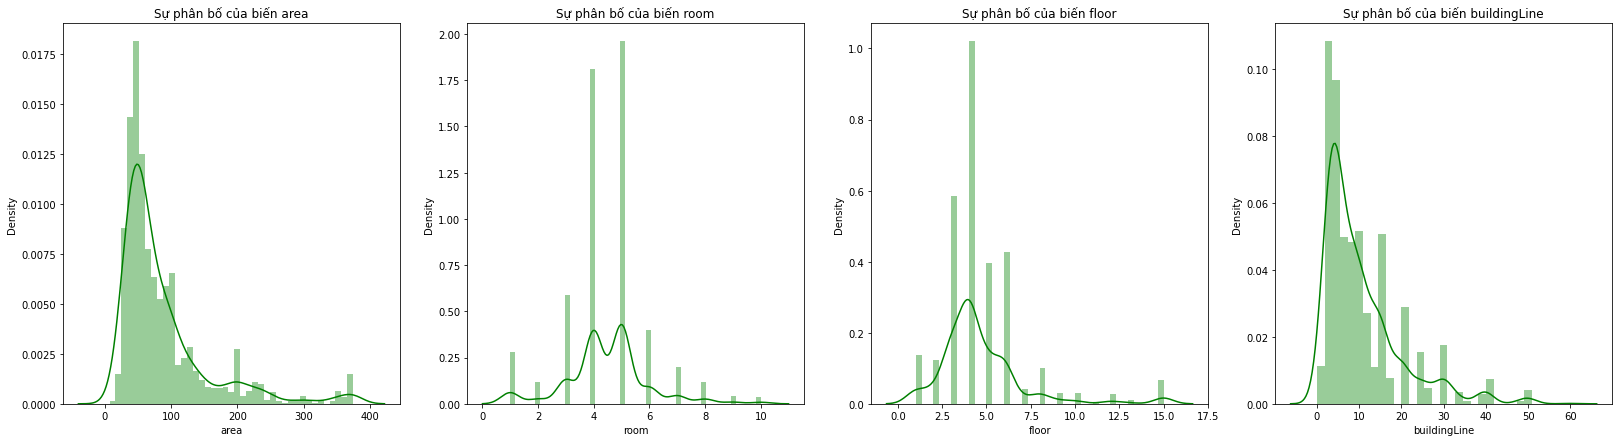

In [ ]:

plt.figure(figsize=(35,7))
plt.subplot(151)
sns.distplot(x_train['area'],color='green').set_title("Sự phân bố của biến area")
plt.subplot(152)
sns.distplot(x_train['room'],color='green').set_title("Sự phân bố của biến room")
plt.subplot(153)
sns.distplot(x_train['floor'],color='green').set_title("Sự phân bố của biến floor")
plt.subplot(154)
sns.distplot(x_train['buildingLine'],color='green').set_title("Sự phân bố của biến buildingLine")

# Hàm chuẩn hóa dữ liệu MIN-MAX

Chưa chuẩn hóa

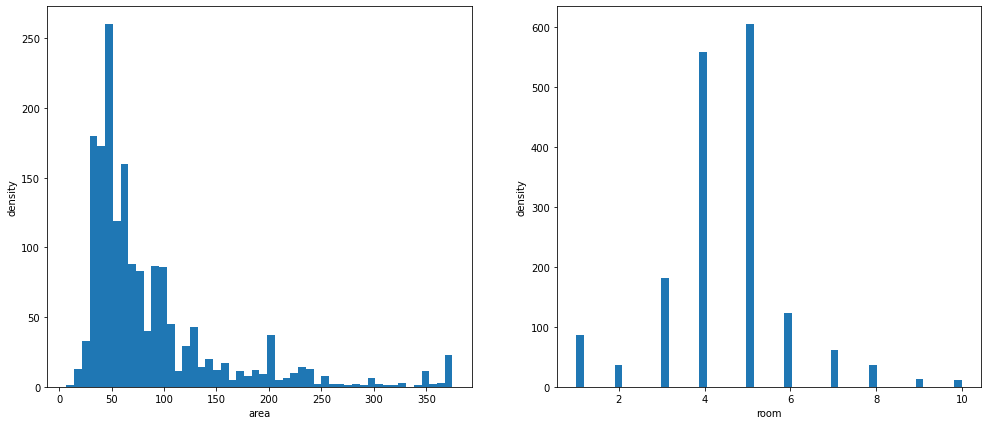

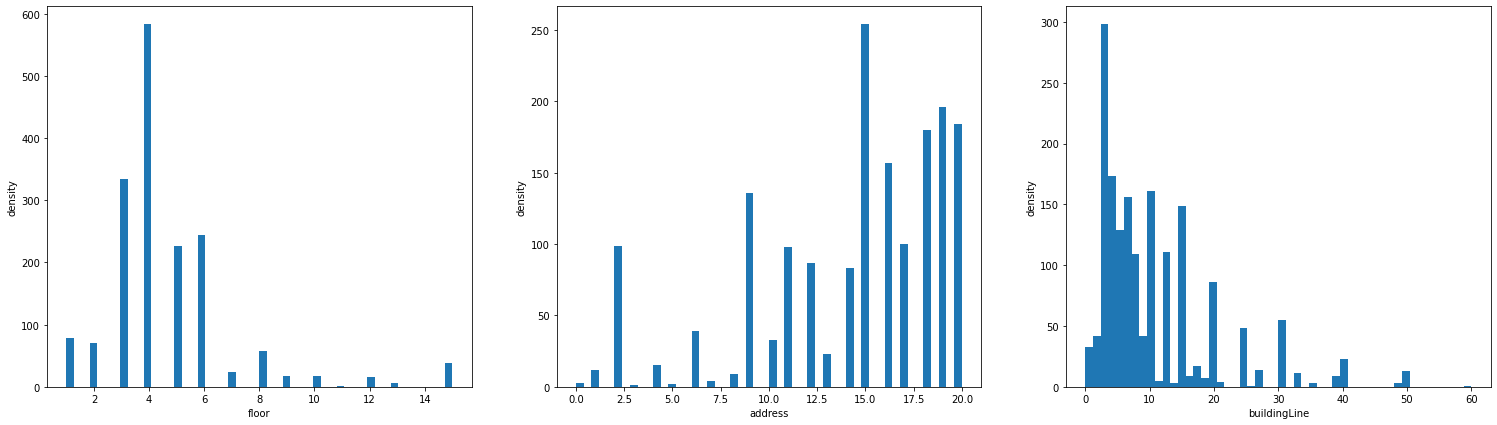

In [ ]:
def plot_hist():
  plt.figure(figsize=(35,7))
  plt.subplot(141)
  plt.xlabel('area')
  plt.ylabel('density')
  plt.hist(x_train['area'],bins=50)
  plt.subplot(142)
  plt.xlabel('room')
  plt.ylabel('density')
  plt.hist(x_train['room'],bins=50)
  plt.figure(figsize=(35,7))
  plt.subplot(141)
  plt.xlabel('floor')
  plt.ylabel('density')
  plt.hist(x_train['floor'],bins=50)
  plt.subplot(142)
  plt.xlabel('address')
  plt.ylabel('density')
  plt.hist(x_train['address'],bins=50)
  plt.subplot(143)
  plt.xlabel('buildingLine')
  plt.ylabel('density')
  plt.hist(x_train['buildingLine'],bins=50)
plot_hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def MinMax(data):
  min_max = MinMaxScaler()
  df_minmax = pd.DataFrame(min_max.fit_transform(data), columns=data.columns)
  return df_minmax
x_train = MinMax(x_train)


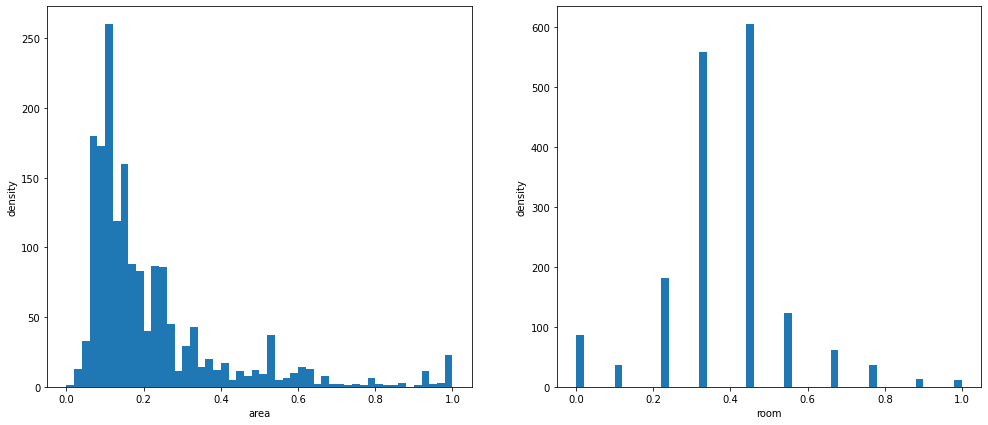

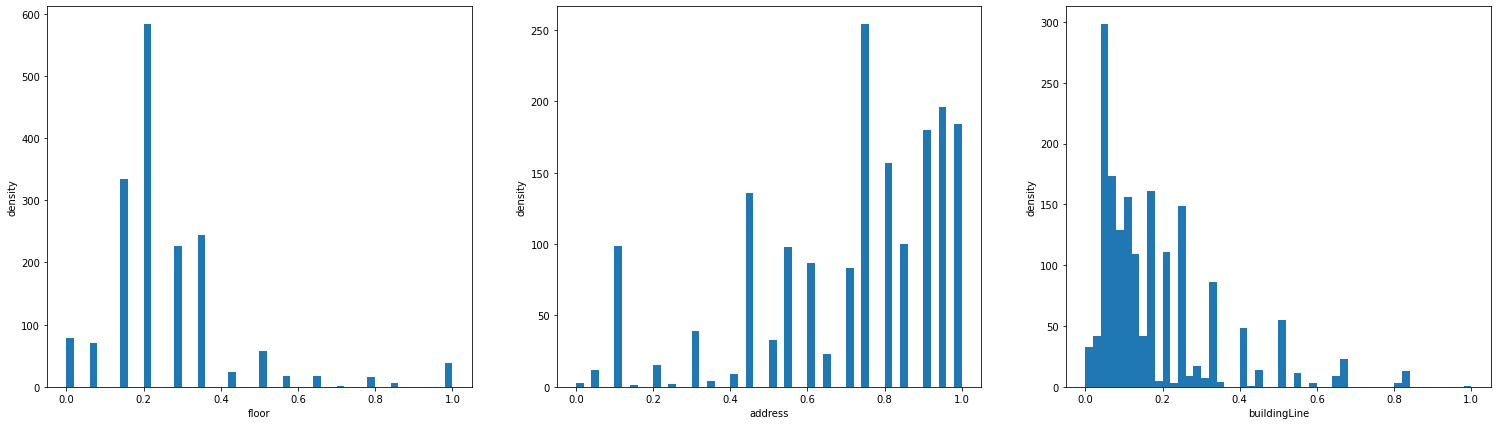

In [ ]:
plot_hist()

# Mô hình hóa dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy import mean
from sklearn import preprocessing


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sự phân bố của biến price')

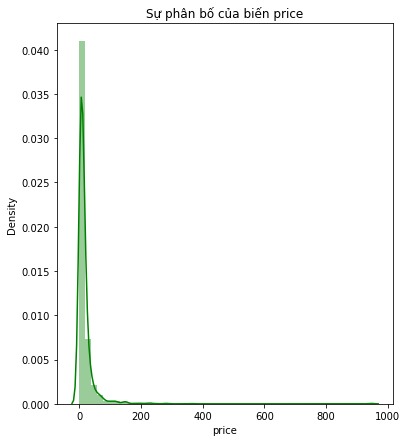

In [ ]:
plt.figure(figsize=(35,7))
plt.subplot(151)
sns.distplot(df['price'],color='green').set_title("Sự phân bố của biến price")

In [ ]:
y_train

,price
2390,24.5
2087,8.8
1271,6.6
1797,6.6
319,7.2
...,...
364,23.3
2274,18.9
828,0.0
859,3.6


Phân lớp đặc trưng price trên tập train.

In [ ]:
y_train.loc[ y_train['price'] <= 6] = 6
y_train.loc[ (y_train['price'] <= 14) & (y_train['price'] > 6 )]= 14
y_train.loc [y_train['price'] > 14] = 20
y_train.value_counts()

price
6.0      593
14.0     573
20.0     549
dtype: int64

Phân lớp đặc trưng price trên toàn tập Dữ liệu

In [ ]:
df.loc[df['price']<= 6,'price'] = 6
df.loc[(df['price'] <= 14) & (df['price'] > 6 ),'price']= 14
df.loc[df['price'] > 14,'price'] = 20
df['price'].value_counts()

6.0     832
14.0    821
20.0    797
Name: price, dtype: int64

Gọi hàm chuẩn hóa min-max

In [ ]:
x_train = MinMax(x_train)
x_test = MinMax(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
list_SVM = []
RMSE_SVM = []

svc_model = svm.SVC() 
gnb = GaussianNB()
scoresSVM = cross_val_score(svc_model, x_train, y_train, cv=10)
print('Max score SVM: ', max(scoresSVM))
scoresNB = cross_val_score(gnb, x_train, y_train, cv=10)
print('Max score GNB: ', max(scoresNB))

Max score SVM:  0.391812865497076
Max score GNB:  0.36627906976744184


SVM

In [ ]:
list_SVM = []
RMSE_SVM = []
for i in range(1,100) :
    X_train,X_test,y_train,y_test=train_test_split(df[['area','room','floor','address','buildingLine']],df['price'], test_size=0.3, random_state=i, shuffle = True)
    XLNL(X_train,'area')
    XLNL(X_train,'floor')
    XLNL(X_train,'room')
    XLNL(X_train,'address')
    XLNL(X_train,'buildingLine')

    X_train = MinMax(X_train)
    X_test = MinMax(X_test)

    svc_model = svm.SVC() 
    svc_model.fit(X_train, y_train) 
    y_pred = svc_model.predict(X_test) 
    list_SVM.append(accuracy_score(y_test,y_pred))
    rms =  mean_squared_error(y_test, y_pred , squared=False)
    RMSE_SVM.append(rms)
print("Max score SVM: ",round(max(list_SVM),2))
print("RMSE SVM: ",round( RMSE_SVM[list_SVM.index(max(list_SVM))],2))

Max score SVM:  0.5
RMSE SVM:  6.98


Text(0.5, 0, 'N')

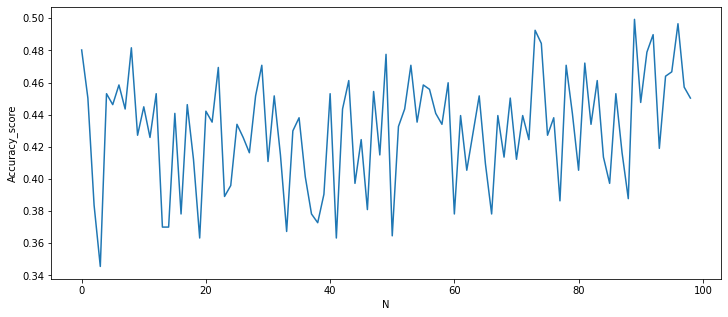

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(list_SVM)
plt.ylabel('Accuracy_score')
plt.xlabel('N')

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
list_NB = []
RMSE_NB = []
for i in range(1,100) :
    X_train,X_test,y_train,y_test=train_test_split(df[['area','room','floor','address','buildingLine']],df['price'], test_size=0.3, random_state=i, shuffle = True)
    XLNL(X_train,'area')
    XLNL(X_train,'room')
    XLNL(X_train,'floor')
    XLNL(X_train,'address')
    XLNL(X_train,'buildingLine')

    X_train = MinMax(X_train)
    X_test = MinMax(X_test)
    
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    y_pred = gnb.predict(X_test) 
    list_NB.append(accuracy_score(y_test,y_pred))
    rms =  mean_squared_error(y_test, y_pred , squared=False)
    RMSE_NB.append(rms)
print("Max score Naive Bayes: ",round(max(list_NB),2))
print("RMSE score Naive Bayes: ",round( RMSE_NB[list_NB.index(max(list_NB))],2))

Max score Naive Bayes:  0.45
RMSE score Naive Bayes:  7.88


Text(0.5, 0, 'N')

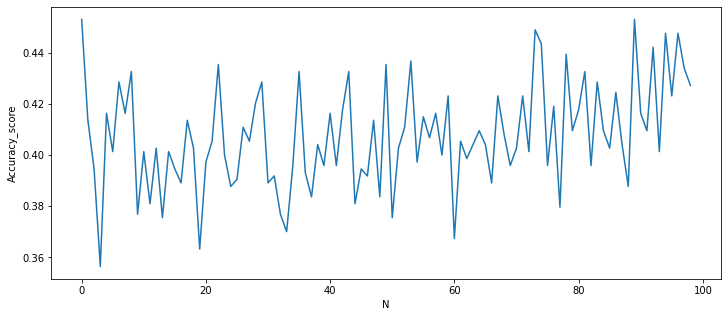

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(list_NB)
plt.ylabel('Accuracy_score')
plt.xlabel('N')

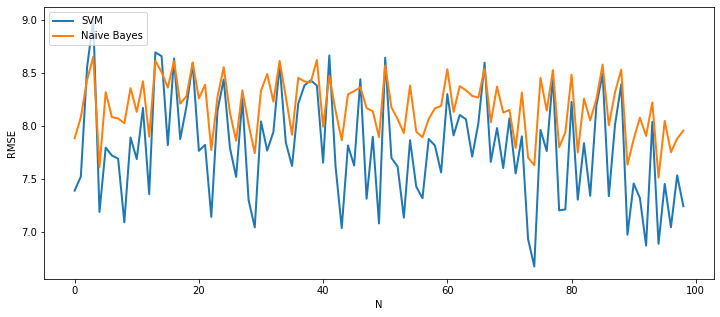

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(RMSE_SVM,   label = 'SVM', linewidth=2)
plt.plot(RMSE_NB,   label = 'Naive Bayes', linewidth=2)

plt.xlabel('N')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.show()

** Nhận xét: Mô hình SVM cho giá dãy giá trị RMSE thấp hơn Naive Bayes cho thấy trong bài toán này mô hình SVM cho kết quả độ lệch với dự đoán ít hơn so với Naive Bayes.